<a href="https://colab.research.google.com/github/alessiaperrone03/sea_level_overTime/blob/main/seaLevel_overTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
df = pd.read_csv('epa_sea_level.csv')
print(df.head())

   Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0  1880                  0.000000          -0.952756           0.952756   
1  1881                  0.220472          -0.732283           1.173228   
2  1882                 -0.440945          -1.346457           0.464567   
3  1883                 -0.232283          -1.129921           0.665354   
4  1884                  0.590551          -0.283465           1.464567   

   NOAA Adjusted Sea Level  
0                      NaN  
1                      NaN  
2                      NaN  
3                      NaN  
4                      NaN  


In [128]:
df.info

<bound method DataFrame.info of      Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
139  2019                       NaN                NaN                NaN   
140  2020                       NaN                NaN                NaN   
141  2021                       NaN                NaN                NaN   
142  2022                       NaN                NaN                NaN   
143  2023                       NaN                NaN                NaN   

     NOAA Adjusted Sea Level  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
139                 9.594329  
140                 9.699874  
141                 9.886688  
142                 9.974711  
143                10.203904  

[144 rows x 5 columns]>

In [129]:
df.isnull().sum()

,0
Year,0
CSIRO Adjusted Sea Level,10
Lower Error Bound,10
Upper Error Bound,10
NOAA Adjusted Sea Level,113


In [130]:
year = df['Year']
sea_level = df['CSIRO Adjusted Sea Level']
print(year)
print(sea_level)

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
139    2019
140    2020
141    2021
142    2022
143    2023
Name: Year, Length: 144, dtype: int64
0      0.000000
1      0.220472
2     -0.440945
3     -0.232283
4      0.590551
         ...   
139         NaN
140         NaN
141         NaN
142         NaN
143         NaN
Name: CSIRO Adjusted Sea Level, Length: 144, dtype: float64


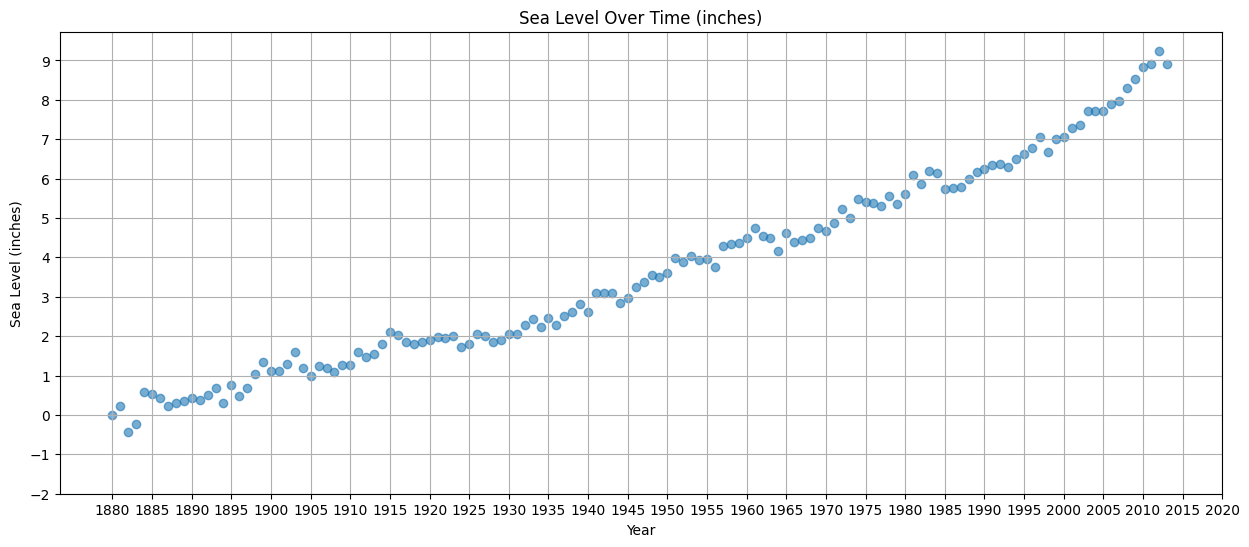

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.scatter(year, sea_level, marker='o', alpha=0.6)
plt.xlabel('Year')
plt.ylabel('Sea Level (inches)')
plt.title('Sea Level Over Time (inches)')
plt.yticks(range(-2, 10, 1))
plt.xticks(range(1880, 2023, 5))
plt.grid(True)
plt.show()

In [132]:
df_copy = df.copy()

In [133]:
df_copy = df_copy.dropna()

In [134]:
print(df_copy.isnull().sum())

Year                        0
CSIRO Adjusted Sea Level    0
Lower Error Bound           0
Upper Error Bound           0
NOAA Adjusted Sea Level     0
dtype: int64


In [135]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [136]:
# Seleziona solo le colonne necessarie (anno e livello del mare)
data = df_copy[['Year', 'CSIRO Adjusted Sea Level']]

# Normalizza i dati (importante per LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['CSIRO Adjusted Sea Level']])

# Prepariamo i dati in sequenze (window)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Imposta il numero di time steps (passaggi temporali)
time_step = 10
X, y = create_dataset(scaled_data, time_step)

# Riformatta X per il modello LSTM
X = X.reshape(X.shape[0], X.shape[1], 1)

# Suddividi i dati in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [137]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Crea il modello LSTM
model = Sequential()

# Aggiungi il layer LSTM
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout per evitare overfitting

# Aggiungi un altro layer LSTM
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Aggiungi il layer di output
model.add(Dense(units=1))

# Compila il modello
model.compile(optimizer='adam', loss='mean_squared_error')

# Visualizza il sommario del modello
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 10, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
# Addestra il modello
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.3794 - val_loss: 0.7815
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 0.3293 - val_loss: 0.7068
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.3082 - val_loss: 0.6341
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 0.2779 - val_loss: 0.5624
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.2342 - val_loss: 0.4909
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1993 - val_loss: 0.4196
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.1731 - val_loss: 0.3485
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1366 - val_loss: 0.2778
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.1073 - val_loss: 0.2087
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - loss: 0.0827 - val_loss: 0.1431
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - loss: 0.0409 - val_loss: 0.0846
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0217 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


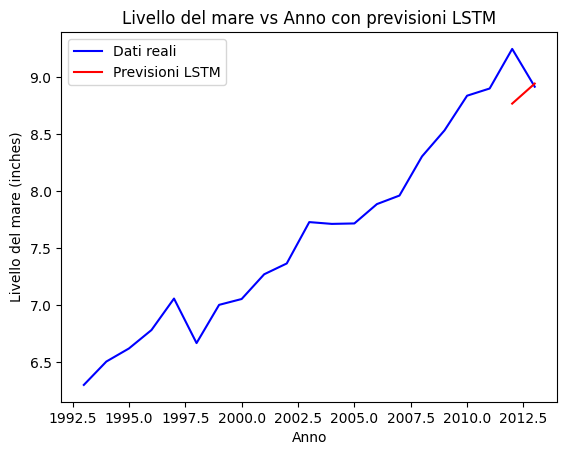

In [139]:
# Previsioni sui dati di test
predictions = model.predict(X_test)

# Inverti la normalizzazione per tornare ai valori originali
predictions = scaler.inverse_transform(predictions)

# Visualizza i risultati
plt.plot(df_copy['Year'], df_copy['CSIRO Adjusted Sea Level'], color='blue', label='Dati reali')
plt.plot(df_copy['Year'][len(df_copy) - len(predictions):], predictions, color='red', label='Previsioni LSTM')
plt.xlabel('Anno')
plt.ylabel('Livello del mare (inches)')
plt.title('Livello del mare vs Anno con previsioni LSTM')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


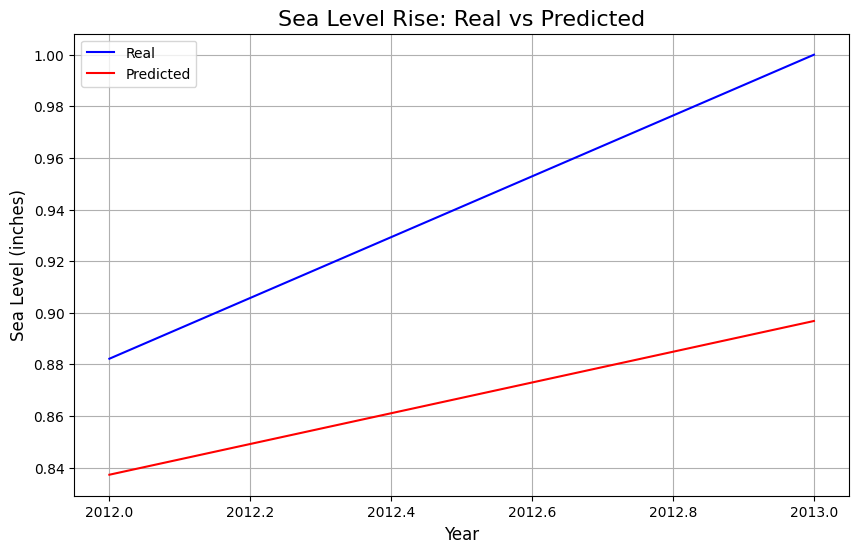

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1. Fare delle previsioni con il modello LSTM
predictions = model.predict(X_test)  # X_test è il tuo set di test

# 2. Creare un DataFrame per le previsioni
# Supponiamo che y_test siano i valori reali corrispondenti
# Use the last len(predictions) years from df_copy for the 'Year' column
results = pd.DataFrame({
    'Year': df_copy['Year'][len(df_copy) - len(predictions):],  # Anno dai dati di test
    'Real Sea Level': y_test.flatten(),  # Valori reali
    'Predicted Sea Level': predictions.flatten()  # Valori previsti
})

# 3. Visualizzare il grafico con Seaborn
plt.figure(figsize=(10, 6))

# Traccia i dati reali e previsti
sns.lineplot(x='Year', y='Real Sea Level', data=results, label='Real', color='blue')
sns.lineplot(x='Year', y='Predicted Sea Level', data=results, label='Predicted', color='red')

# Aggiungi titolo e etichette agli assi
plt.title('Sea Level Rise: Real vs Predicted', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea Level (inches)', fontsize=12)

# Mostra la legenda
plt.legend()

# Mostra la griglia
plt.grid(True)

# Visualizza il grafico
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━

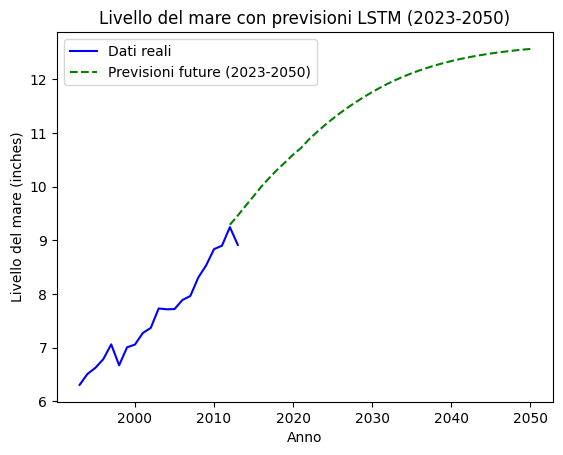

In [141]:
# Previsioni future per gli anni successivi
future_years = range(2012, 2051)
input_seq = scaled_data[-time_step:].reshape(1, time_step, 1)

future_predictions = []

for year in future_years:
    # Predici il livello del mare per l'anno successivo
    pred = model.predict(input_seq)
    future_predictions.append(pred[0][0])

    # Aggiungi la previsione come input per la previsione successiva
    input_seq = np.append(input_seq[:, 1:, :], pred.reshape(1, 1, 1), axis=1)

# Inverti la normalizzazione delle previsioni future
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Visualizza i risultati
plt.plot(df_copy['Year'], df_copy['CSIRO Adjusted Sea Level'], color='blue', label='Dati reali')
plt.plot(future_years, future_predictions, color='green', linestyle='--', label='Previsioni future (2023-2050)')
plt.xlabel('Anno')
plt.ylabel('Livello del mare (inches)')
plt.title('Livello del mare con previsioni LSTM (2023-2050)')
plt.legend()
plt.show()


Year                        0
CSIRO Adjusted Sea Level    0
Lower Error Bound           0
Upper Error Bound           0
NOAA Adjusted Sea Level     0
dtype: int64
Intercept: -315.1920391339076
Slope: 0.16112312867472522
Regression line coefficients: Intercept = -315.1920391339076 , Slope = 0.16112312867472522
Predicted values for 2000-2050: [7.05421822 7.21534134 7.37646447 7.5375876  7.69871073 7.85983386
 8.02095699 8.18208012 8.34320324 8.50432637]


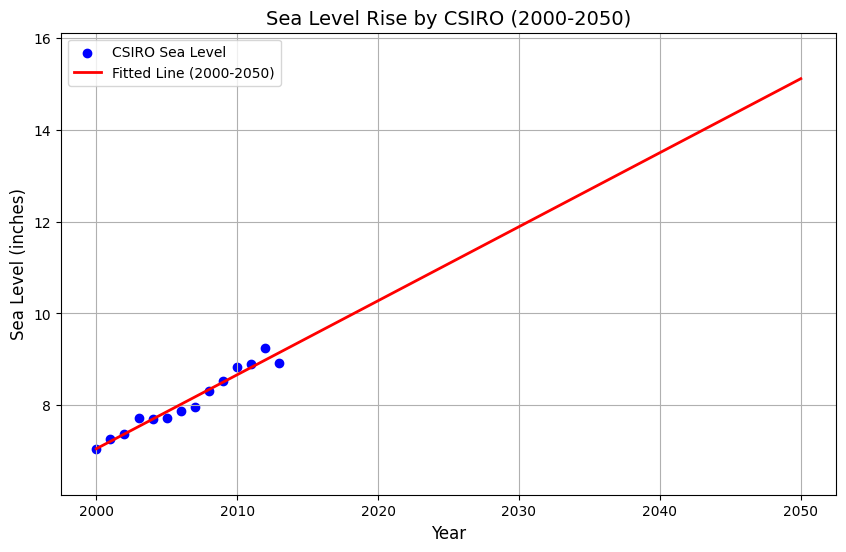

In [142]:
# Rimuovere righe con valori NaN nei dati specifici
df_last = df[df['Year'] >= 2000].dropna(subset=['CSIRO Adjusted Sea Level', 'Year'])

# Verifica se ci sono NaN nel DataFrame
print(df_last.isna().sum())

# Procedi con la regressione
Lin_Reg_Last = linregress(x=df_last['Year'], y=df_last['CSIRO Adjusted Sea Level'])

# Stampa i coefficienti della regressione per il debug
print("Intercept:", Lin_Reg_Last.intercept)
print("Slope:", Lin_Reg_Last.slope)

# Prosegui con il resto del codice

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the data from the year 2000 onward
df_last = df[df['Year'] >= 2000]


# Data for plotting
x1 = df_last['Year']
y1 = df_last['CSIRO Adjusted Sea Level']
x2 = np.arange(2000, 2051)  # Years from 2000 to 2050 for prediction
y2 = Lin_Reg_Last.intercept + Lin_Reg_Last.slope * x2  # Predicted sea level

# Print the values for debugging
print("Regression line coefficients: Intercept =", Lin_Reg_Last.intercept, ", Slope =", Lin_Reg_Last.slope)
print("Predicted values for 2000-2050:", y2[:10])  # Print first 10 predicted values

# Plotting the data and the fitted line
plt.figure(figsize=(10, 6))  # Optional: Increase the figure size for better clarity
plt.scatter(x1, y1, label='CSIRO Sea Level', color='blue')  # Plot the actual data
plt.plot(x2, y2, label='Fitted Line (2000-2050)', color='red', linewidth=2)  # Plot the fitted line

# Set y-axis limits to make sure everything fits
plt.ylim(min(y1.min(), y2.min()) - 1, max(y1.max(), y2.max()) + 1)

# Adding labels and title
plt.xlabel('Year', fontsize=12)
plt.ylabel('Sea Level (inches)', fontsize=12)
plt.title('Sea Level Rise by CSIRO (2000-2050)', fontsize=14)

# Display grid
plt.grid(True)

# Adding a legend
plt.legend()

# Show the plot
plt.show()


In [144]:
import pandas as pd

# Crea un DataFrame con gli anni futuri e le relative previsioni
future_predictions_df = pd.DataFrame({
    'Year': future_years,
    'Predicted Sea Level (inches)': future_predictions.flatten()
})

# Visualizza il DataFrame
print(future_predictions_df)

# Se desideri anche salvarlo come CSV
future_predictions_df.to_csv('future_predictions.csv', index=False)


    Year  Predicted Sea Level (inches)
0   2012                      9.288106
1   2013                      9.459841
2   2014                      9.643153
3   2015                      9.821234
4   2016                     10.003230
5   2017                     10.164224
6   2018                     10.316354
7   2019                     10.453356
8   2020                     10.596325
9   2021                     10.719873
10  2022                     10.880238
11  2023                     11.015520
12  2024                     11.143968
13  2025                     11.264579
14  2026                     11.377694
15  2027                     11.482943
16  2028                     11.581752
17  2029                     11.674532
18  2030                     11.762086
19  2031                     11.843761
20  2032                     11.920671
21  2033                     11.990274
22  2034                     12.054219
23  2035                     12.112859
24  2036                 

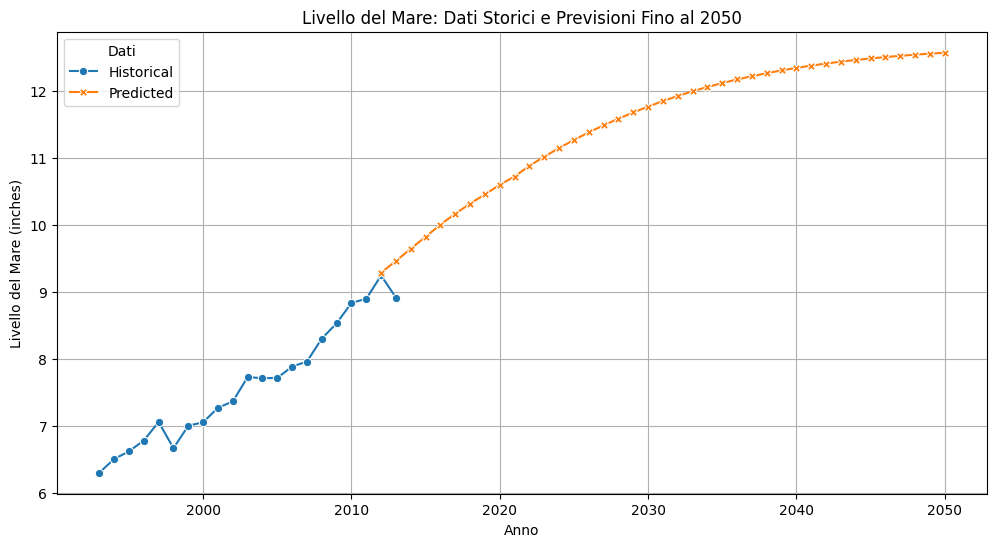

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creiamo un DataFrame per unire i dati storici e quelli predetti
df_future = pd.DataFrame({'Year': future_years, 'Sea Level': future_predictions.flatten(), 'Type': 'Predicted'})
df_historical = pd.DataFrame({'Year': df_copy['Year'], 'Sea Level': df_copy['CSIRO Adjusted Sea Level'], 'Type': 'Historical'})

# Uniamo i due DataFrame
df_combined = pd.concat([df_historical, df_future])

# Impostiamo il grafico con Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined, x='Year', y='Sea Level', hue='Type', style='Type', markers=True, dashes=False)

# Personalizzazione del grafico
plt.xlabel('Anno')
plt.ylabel('Livello del Mare (inches)')
plt.title('Livello del Mare: Dati Storici e Previsioni Fino al 2050')
plt.grid(True)

# Mostra la legenda
plt.legend(title="Dati")

# Mostra il grafico
plt.show()


In [153]:
print(df_combined)

     Year  Sea Level        Type
113  1993   6.303150  Historical
114  1994   6.507874  Historical
115  1995   6.622047  Historical
116  1996   6.783465  Historical
117  1997   7.059055  Historical
118  1998   6.669291  Historical
119  1999   7.003937  Historical
120  2000   7.055118  Historical
121  2001   7.271654  Historical
122  2002   7.366142  Historical
123  2003   7.728346  Historical
124  2004   7.712598  Historical
125  2005   7.716535  Historical
126  2006   7.885827  Historical
127  2007   7.960630  Historical
128  2008   8.303150  Historical
129  2009   8.531496  Historical
130  2010   8.834646  Historical
131  2011   8.897638  Historical
132  2012   9.244094  Historical
133  2013   8.913386  Historical
0    2012   9.288106   Predicted
1    2013   9.459841   Predicted
2    2014   9.643153   Predicted
3    2015   9.821234   Predicted
4    2016  10.003230   Predicted
5    2017  10.164224   Predicted
6    2018  10.316354   Predicted
7    2019  10.453356   Predicted
8    2020 

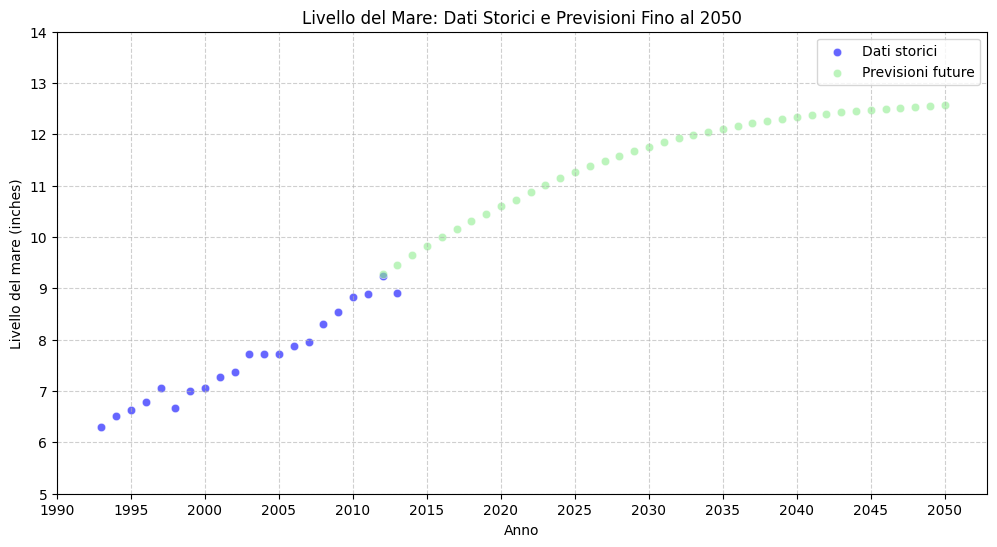

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creazione della figura
plt.figure(figsize=(12, 6))

# Scatter plot per i dati storici (1880-2022)
sns.scatterplot(x=df_copy['Year'], y=df_copy['CSIRO Adjusted Sea Level'], marker='o', alpha=0.6, color='blue', label='Dati storici')

# Scatter plot per le previsioni future (2023-2050)
sns.scatterplot(x=future_years, y=future_predictions.flatten(), marker='o', alpha=0.6, color='lightgreen', label='Previsioni future')

# Etichette e titolo
plt.xlabel('Anno')
plt.ylabel('Livello del mare (inches)')
plt.title('Livello del Mare: Dati Storici e Previsioni Fino al 2050')

# Personalizzazione assi
plt.xticks(range(1990, 2051, 5))
plt.yticks(range(5, 15, 1))

# Aggiunta della griglia
plt.grid(True, linestyle='--', alpha=0.6)

# Legenda
plt.legend()

# Mostra il grafico
plt.show()
